In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load your dataset
df = pd.read_csv("solar_data_without_day.csv")

# Select relevant features
features = ['Clearsky DHI', 'Wind Speed', 'Wind Direction']
data = df[features].values

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Prepare data for LSTM
X = []
y = []
n_features = len(features)
n_steps = 24  # Number of time steps to consider

for i in range(n_steps, len(data_scaled)):
    X.append(data_scaled[i - n_steps:i, :])
    y.append(data_scaled[i, 0])

X, y = np.array(X), np.array(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define LSTM model
model = Sequential([
    LSTM(units=50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)),
    LSTM(units=50, activation='relu'),
    Dense(units=1)
])

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate model
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

# Make predictions
predictions = model.predict(X_test)


C:\Users\Sai Thanishvi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
17520/17520 ━━━━━━━━━━━━━━━━━━━━ 329s 19ms/step - loss: 6.6461e-04
Epoch 2/50
17520/17520 ━━━━━━━━━━━━━━━━━━━━ 347s 20ms/step - loss: 7.9477e-05
Epoch 3/50
17520/17520 ━━━━━━━━━━━━━━━━━━━━ 393s 22ms/step - loss: 7.1492e-05
Epoch 4/50
17520/17520 ━━━━━━━━━━━━━━━━━━━━ 366s 21ms/step - loss: 6.8843e-05
Epoch 5/50
17520/17520 ━━━━━━━━━━━━━━━━━━━━ 342s 20ms/step - loss: 6.7820e-05
Epoch 6/50
17520/17520 ━━━━━━━━━━━━━━━━━━━━ 337s 19ms/step - loss: 6.7314e-05
Epoch 7/50
17520/17520 ━━━━━━━━━━━━━━━━━━━━ 365s 21ms/step - loss: 6.8016e-05
Epoch 8/50
17520/17520 ━━━━━━━━━━━━━━━━━━━━ 293s 17ms/step - loss: 6.7206e-05
Epoch 9/50
17520/17520 ━━━━━━━━━━━━━━━━━━━━ 206s 12ms/step - loss: 6.4946e-05
Epoch 10/50
17520/17520 ━━━━━━━━━━━━━━━━━━━━ 214s 12ms/step - loss: 6.5828e-05
Epoch 11/50
17520/17520 ━━━━━━━━━━━━━━━━━━━━ 232s 13ms/step - loss: 6.5306e-05
Epoch 12/50
17520/17520 ━━━━━━━━━━━━━━━━━━━━ 221s 13ms/step - loss: 6.3781e-05
Epoch 13/50
17520/17520 ━━━━━━━━━━━━━━━━━━━━ 239s 14ms/step -

R-squared: 0.9929952516907673
MAE: 0.003476704242008308


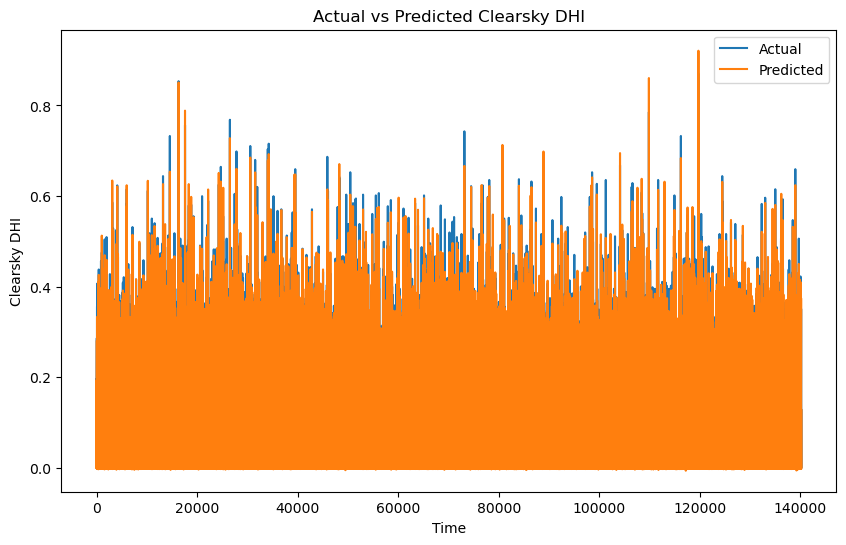

In [2]:
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Calculate R-squared
r_squared = r2_score(y_test, predictions)
print('R-squared:', r_squared)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)
print('MAE:', mae)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Clearsky DHI')
plt.title('Actual vs Predicted Clearsky DHI')
plt.legend()
plt.show()